## Lab #1 Assignment
## Data Analysis with Python
## Lovina Putri


***(1) Set-up code***

In [ ]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns


***(2) Import data***

In [ ]:
url = 'https://raw.githubusercontent.com/lovinaaisha/wfh/refs/heads/main/wfh_tidy_person.csv'
df = pd.read_csv(url)

***Note for the dataset:***

I am using working-from-home data from [Gabor's Data Analysis dataset](https://gabors-data-analysis.com/datasets/#working-from-home).

Content and coverage: The working-from-home data includes information about the employees of a travel agency in China from 2010. The dataset has N=249 observations.

Key variables: employee retention, employee performance.

The data was collected as part of the experiment run by Nicholas Bloom, James Liang, John Roberts, and Zhichun Jenny Ying, published in the Quarterly Journal of Economics, "Does working from home work? Evidence from a Chinese experiment."  Volume 130, Issue 1, February 2015, Pages 165–218, https://doi.org/10.1093/qje/qju032

I am using the dataset of **wfh_tidy_person**:


*   Person-level file with people in the experiment, n=249
*   ID variable personid
*   Other important variables:
    *  treatment:	whether observiation is in treatment group
    *  ordertaker:	whether in treatment group
    *  quitjob: 	whether quit job by end of experiment
    *  phonecalls1:	number of phone calls placed during experiment

However, I will only use the control variables in this lab assignment.

***(3) Data check***

In [ ]:
df.head()

,personid,treatment,ordertaker,type,quitjob,age,costofcommute,children,male,married,...,ageyoungestchild,rental,bedroom,second_technical,high_school,tertiary_technical,university,internet,phonecalls0,phonecalls1
0,3906,1,False,2,0,33,8.0,1,0,1,...,10,0,1,0,1,0,0,1,0.000,0.000
1,4122,1,True,1,0,30,18.0,0,0,0,...,0,0,0,0,1,0,0,1,21.335,21.797
2,4448,0,False,2,0,35,10.0,1,0,1,...,11,0,1,0,1,0,0,1,0.000,0.000
3,4942,1,False,4,0,27,20.0,0,0,1,...,0,0,1,1,0,0,0,1,0.000,0.000
4,5018,1,False,4,0,29,15.0,1,0,1,...,0,0,1,1,0,0,0,1,0.000,0.000


***Question 1*** \
1-- Choose one variable, look at its distribution (mean, sd, median, min, max), or if it is categorical, create a simple table for it, and plot it with a histogram.  Explain what you take away from looking at the variable.

**Answer 1:** \

For this question, I first choose the demographic variable of workers: gender of male or female. This is a dummy variable where male = 1 indicates the worker is male and male = 0 indicates otherwise (the worker is female). From the raw values, we can find that the 116 out of 249 respondents is a male.



In [ ]:
df.male.value_counts().sort_index()

,count
male,
0,133
1,116


From the percentages terms below, we can see that 46.6% of the workers is male and 53.4% of the workers is female.

In [ ]:
df.male.value_counts(normalize=True).sort_index()*100

,proportion
male,
0,53.413655
1,46.586345


Below is the histogram of this data. Since it is a dummy variable, most of the data only centered in value of 0 and 1.

<Axes: xlabel='male', ylabel='Count'>

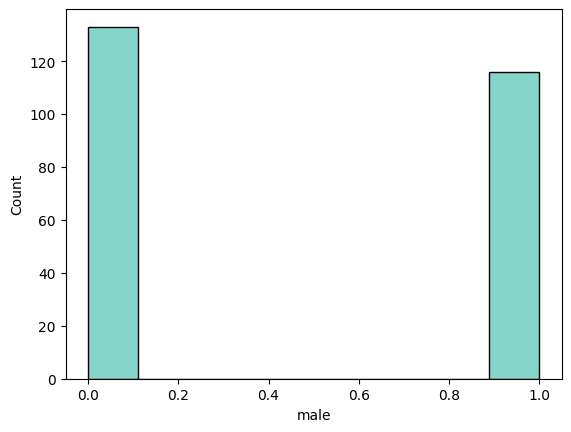

In [ ]:
sns.histplot(data=df, x="male", color="#5ec8ba")

For example in the continuous variable, I am using gross wage variable which is the sum of base wage + bonuses received by the labor in terms of yuan currency. Below is the descriptive statisics. We can see that the mean of gross wage is 2,975.15 with the standard deviation of 789.63. There's no missing data in this dataset.

In [ ]:
def count_non_missing(x):
    return x.count()
def percent_missing(x):
    return 100 * x.isna().sum() / len(x)
def interquartile_range(x):
    return np.percentile(x.dropna(), 75) - np.percentile(x.dropna(), 25)

# Calculate multiple summary statistics for 'value'
sum_stats = df['grosswage'].agg(
    mean='mean',
    std='std',
    min='min',
    max='max',
    median='median',
    count_non_missing=count_non_missing,
    percent_missing=percent_missing,
    iqr=interquartile_range,
    skewness=lambda x: skew(x.dropna()),
    kurtosis=lambda x: kurtosis(x.dropna())
)

# Display the results
print(sum_stats)

mean                 2975.145784
std                   789.626917
min                  1387.589966
max                  6220.745605
median               2786.255615
count_non_missing     249.000000
percent_missing         0.000000
iqr                  1082.007568
skewness                0.848957
kurtosis                0.644352
Name: grosswage, dtype: float64


Below is the histogram of the distribution of gross wage variable and the descriptive statistics table of male and grosswage variables.

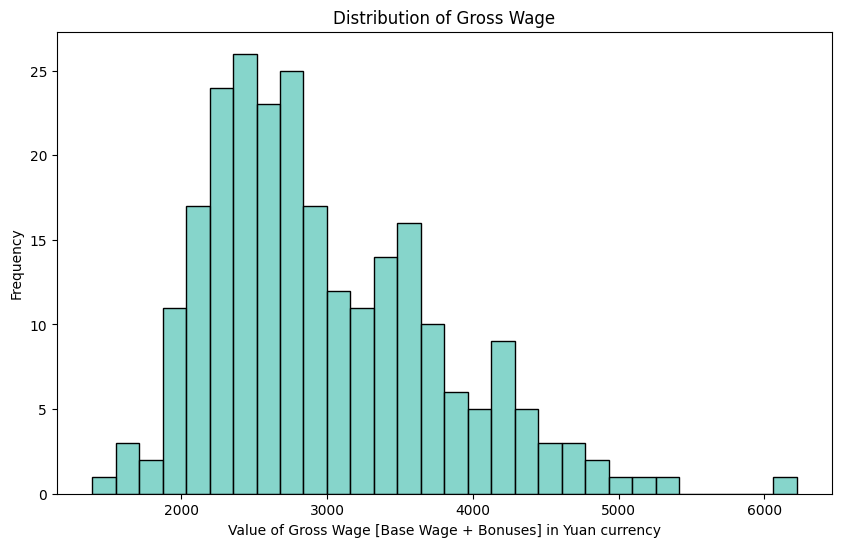

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="grosswage", color="#5ec8ba", bins=30)
plt.title('Distribution of Gross Wage')
plt.xlabel('Value of Gross Wage [Base Wage + Bonuses] in Yuan currency')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df[['male', 'grosswage']].describe()

,male,grosswage
count,249.000000,249.000000
mean,0.465863,2975.145784
std,0.499838,789.626917
min,0.000000,1387.589966
25%,0.000000,2403.451172
50%,0.000000,2786.255615
75%,1.000000,3485.458740
max,1.000000,6220.745605


***Conclusion:*** From the descriptive analysis above, we can see that the distribution of the gross wage is a right-skewed distribution with the median is less than mean value and more data centered around the median. The median of gross wage is 2786.26 and the mean is 2975.15. The IQR is 1082.0. The minimum of gross wage is 1387.59 and the maximum value is 6220.75 -- where only about 1-2 worker received the highest gross wage.

***Question 2*** \
2-- Choose some continuous-ish variable, and calculate its mean and standard deviation by some grouping variable.  Plot it using a box-plot.  Explain what conclusion you draw from this analysis.

**Answer 2:**

We want to see how much is the gross wage by gender, on average. We can see that from the tables below that male worker have lower gross wage of 2919.90 compared to its female counterpart with gross wage of 3023.33, on average. Male workers' gross wage also narrower than the female ones, which indicates that more of the data disperse around the mean. In addition, median of gross wage is slightly lower for male workers (2746.23) compared to female workers (2799.73).

In [ ]:
df.groupby(['male'])['grosswage'].mean()

,grosswage
male,
0,3023.331300
1,2919.898597


In [ ]:
df.groupby(['male'])['grosswage'].std()

,grosswage
male,
0,858.447785
1,702.125198


In [ ]:
df.groupby(['male'])['grosswage'].median()

,grosswage
male,
0,2799.739990
1,2746.227783


In [ ]:
df.groupby(['male'])['grosswage'].describe()

,count,mean,std,min,25%,50%,75%,max
male,,,,,,,,
0,133.0,3023.331300,858.447785,1387.589966,2408.632080,2799.739990,3522.688965,6220.745605
1,116.0,2919.898597,702.125198,1678.546021,2400.605042,2746.227783,3431.347229,4771.545410


<ipython-input-15-76630352609a>:8: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='male', y='grosswage', data=mean_values, color='black',


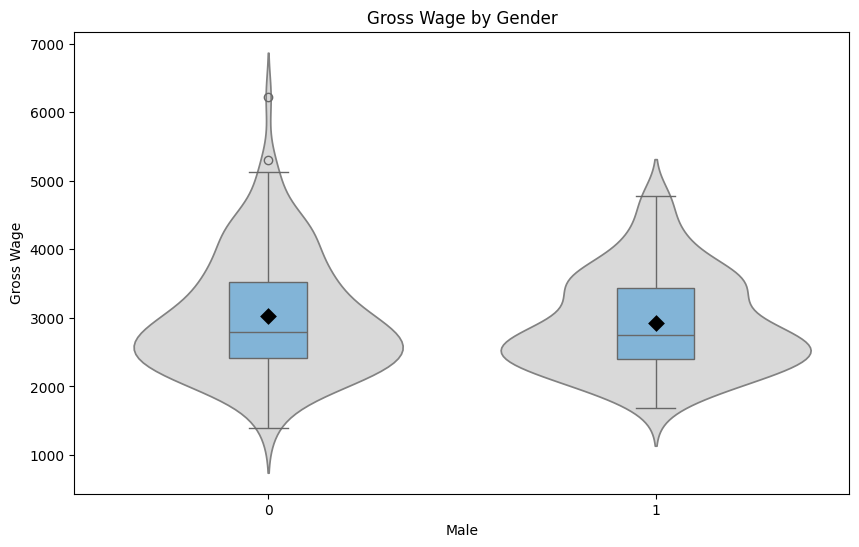

In [ ]:
# Create the violin plot with embedded boxplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='male', y='grosswage', data=df, inner=None, color="0.85")
sns.boxplot(x='male', y='grosswage', data=df, whis=1.5, width=0.2, color="#74b6e5")
# Calculate means for each group
mean_values = df.groupby('male')['grosswage'].mean().reset_index()
# Plot mean values as points
sns.pointplot(x='male', y='grosswage', data=mean_values, color='black',
markers='D', scale=1.2, linestyles='')
# Add title and labels
plt.title('Gross Wage by Gender')
plt.xlabel('Male')
plt.ylabel('Gross Wage')
# Show the plot
plt.show()

***Conclusion:*** From the boxplot above, on average, male workers have slightly lower gross wage (2919.9) compared to female workers (3023.33). The standard deviation of gross wage for male workers (702.13) also lower than the female ones (858.45). The IQR of gross wage for male workers is lower than the female workers (1,030.74 vs 1,111.06). \\

However, through the violin plot, we can see that the dispersion of data is different between the two genders  -- where female workers' gross wage is more dispersed compared to the male workers. We can also see that from the boxplot that there are two outliers in female workers' gross wage with the value of 5,295.40 and 6,220.75, which are higher than 1.5 of the IQR.

***Question 3*** \
3-- Choose two categorical-ish variables, and cross-tabulate them.  Plot them using a stacked bar chart.  Explain what conclusion you draw from this analysis.

**Answer 3:**

Now, we want to cross-tabulate the gender of workers and whether or not they have high school education as their highest educational attainment. We can see that from the table and bar chart below, 18.05% of female workers are high school graduates and 12.93% of male workers are high school graduates.

In [ ]:
pd.crosstab(df.high_school, df.male, normalize='columns')*100

male,0,1
high_school,,
0,81.954887,87.068966
1,18.045113,12.931034


Below is the bar chart visualization of the data:

<Axes: xlabel='male'>

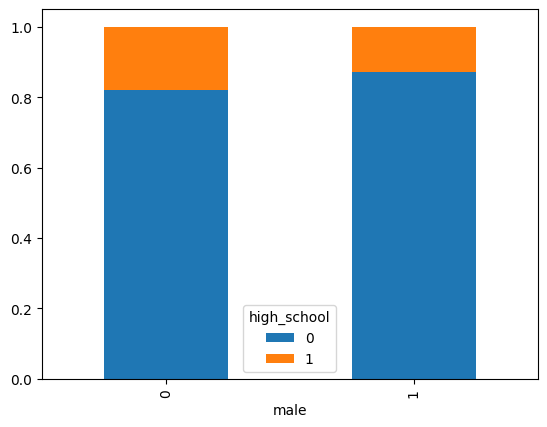

In [ ]:
# Group by 'male' and 'high_school', then count the occurrences
male_high_school_counts = df.groupby(['male', 'high_school']).size()

# Group by 'male' only and count the occurrences
male_counts = df.groupby('male').size()

# Calculate the percentage
d_pct = male_high_school_counts / male_counts

# Unstack and plot the data
d_pct.unstack().plot(kind='bar', stacked=True)

Now, we can recode the education level dummy variables into one categorical variable of workers' educational attainment where:
*   1 = Second Technical
*   2 = High School
*   3 = Tertiary Technical
*   4 = University




In [ ]:
df['educ_level'] = 0
df.loc[df['second_technical'] == 1, 'educ_level'] = 1
df.loc[df['high_school'] == 1, 'educ_level'] = 2
df.loc[df['tertiary_technical'] == 1, 'educ_level'] = 3
df.loc[df['university'] == 1, 'educ_level'] = 4

print(df)

Below is the visualization of the bar chart after we are using the categorical variable for educational attainment. We can see that distribution of male and female workers' educational attainment is pretty much balance, where most of the workers are graduated from secondary technical, tertiary technical, high school, and university -- respectively.

However, we can see that there is a higher percentage of female students that graduated from high school (compared to male) and there are higher percentage of male students that graduated from tertiary technical school (compared to female).

<Axes: xlabel='male'>

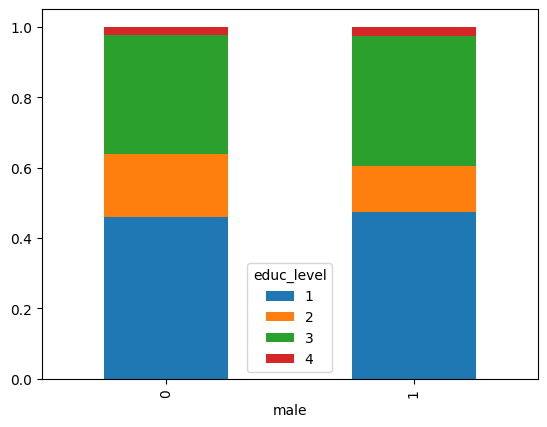

In [ ]:
# Group by 'male' and 'high_school', then count the occurrences
male_educlevel_counts = df.groupby(['male', 'educ_level']).size()

# Group by 'male' only and count the occurrences
male_counts = df.groupby('male').size()

# Calculate the percentage
d_pct = male_educlevel_counts / male_counts

# Unstack and plot the data
d_pct.unstack().plot(kind='bar', stacked=True)